# Machine Learning 17: Logistic Regression - Binary Classification Multiple input

### 1️⃣ **Linear combination (weighted sum):**

$$
z = w_0 + w_1x_1 + w_2x_2 + \cdots + w_nx_n
$$

or more compactly:

$$
z = \mathbf{w}^T \mathbf{x} + b
$$

where:

* $\mathbf{x} = [x_1, x_2, \dots, x_n]^T$ → input feature vector
* $\mathbf{w} = [w_1, w_2, \dots, w_n]^T$ → weight vector
* $b$ (or $w_0$) → bias term (intercept)

### 2️⃣ **Sigmoid activation (to squash output between 0 and 1):**

$$
\hat{y} = \sigma(z) = \frac{1}{1 + e^{-z}}
$$

### 3️⃣ **Final prediction:**

* Output $\hat{y}$ is the probability of class 1.
* For binary classification:

  * If $\hat{y} \geq 0.5$, predict class 1.
  * If $\hat{y} < 0.5$, predict class 0.

✅ **Summary formula:**

$$
\hat{y} = \frac{1}{1 + e^{-(\mathbf{w}^T \mathbf{x} + b)}}
$$


# Import Libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create Database

In [2]:
data = {
    'GRE': [320, 310, 300, 315, 325, 330, 305, 290, 310, 300],
    'TOEFL': [110, 105, 102, 108, 112, 115, 103, 98, 100, 99],
    'University_Rating': [5, 4, 3, 4, 5, 5, 3, 2, 3, 2],
    'SOP': [4.5, 4, 3.5, 4, 5, 5, 3, 2.5, 3, 2.5],
    'LOR': [4.5, 4, 3, 4, 5, 5, 3.5, 2, 3, 2.5],
    'CGPA': [9.8, 9.0, 8.5, 9.1, 9.9, 10, 8.0, 7.5, 8.2, 7.8],
    'Admitted': [1, 1, 0, 1, 1, 1, 0, 0, 0, 0]
}

In [3]:
df = pd.DataFrame(data)
df.head()

,GRE,TOEFL,University_Rating,SOP,LOR,CGPA,Admitted
0,320,110,5,4.5,4.5,9.8,1
1,310,105,4,4.0,4.0,9.0,1
2,300,102,3,3.5,3.0,8.5,0
3,315,108,4,4.0,4.0,9.1,1
4,325,112,5,5.0,5.0,9.9,1


# Basic Exploration

In [4]:
df.describe()

,GRE,TOEFL,University_Rating,SOP,LOR,CGPA,Admitted
count,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,310.500000,105.20000,3.600000,3.700000,3.650000,8.780000,0.500000
std,12.349089,5.82714,1.173788,0.948683,1.028753,0.916273,0.527046
min,290.000000,98.00000,2.000000,2.500000,2.000000,7.500000,0.000000
25%,301.250000,100.50000,3.000000,3.000000,3.000000,8.050000,0.000000
50%,310.000000,104.00000,3.500000,3.750000,3.750000,8.750000,0.500000
75%,318.750000,109.50000,4.750000,4.375000,4.375000,9.625000,1.000000
max,330.000000,115.00000,5.000000,5.000000,5.000000,10.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE                10 non-null     int64  
 1   TOEFL              10 non-null     int64  
 2   University_Rating  10 non-null     int64  
 3   SOP                10 non-null     float64
 4   LOR                10 non-null     float64
 5   CGPA               10 non-null     float64
 6   Admitted           10 non-null     int64  
dtypes: float64(3), int64(4)
memory usage: 692.0 bytes


# Visualization: Scatterplot


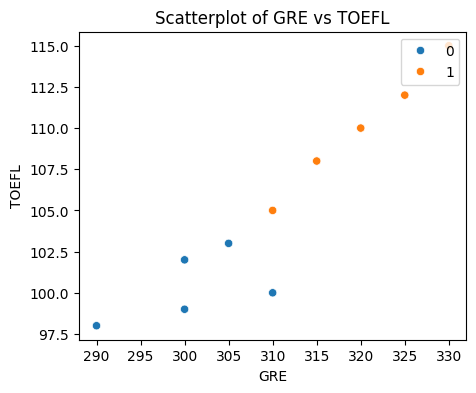

In [6]:
plt.figure(figsize=(5,4))
sns.scatterplot(x='GRE', y='TOEFL', data=df, hue = "Admitted")
plt.title("Scatterplot of GRE vs TOEFL")
plt.legend(loc =1)
plt.show()


# Feature Selection (Multiple Inputs)

In [7]:
X = df[['GRE', 'TOEFL']].to_numpy()  # features
y = df['Admitted'].to_numpy()  #Target

# Feature Scaling (Standardization)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression Model

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [14]:
model.score(X_test,y_test)*100

50.0

# Prediction

In [15]:
y_pred = model.predict(X_test)
y_pred

array([0, 0])

# Evaluation

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [17]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5
Confusion Matrix:
 [[1 0]
 [1 0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

In [18]:
# Probability predictions

In [19]:
y_prob = model.predict_proba(X_test)
print("Predicted Probabilities:\n", y_prob)

Predicted Probabilities:
 [[9.99144268e-01 8.55732297e-04]
 [7.10079190e-01 2.89920810e-01]]


# Plot Decision Boundary

In [20]:
from mlxtend.plotting import plot_decision_regions

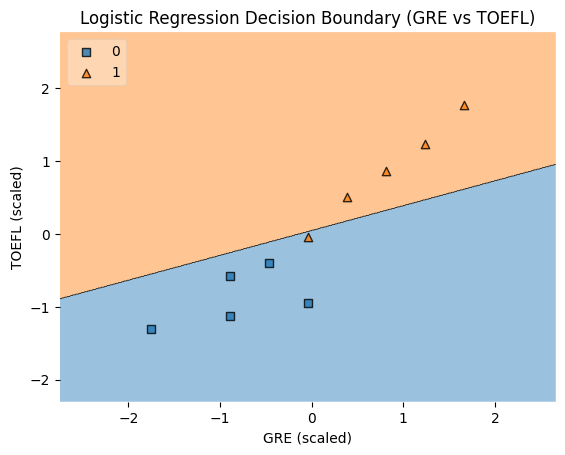

In [21]:
plot_decision_regions(X_scaled, y, clf=model, legend=2)

plt.xlabel('GRE (scaled)')
plt.ylabel('TOEFL (scaled)')
plt.title('Logistic Regression Decision Boundary (GRE vs TOEFL)')
plt.show()